<a href="https://colab.research.google.com/github/keshav123333/Machine_learning_100_campusx/blob/main/Imbalance_Dataset/Imbalance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#imbalance dataset

maan ek data jisme 1 point ke 900 imput and 0 ke 100 hi so even if
mdel humesha 1 pred toh bhi 90 percent accuracy


1 way

You undersample your dataset

example -: you have 300 ->0 class so tum 1000-> 1 se 300 1 chunoge and now 300 -> 0 and 1 ke dataset pe train karoge instead of pehle wale as now 0 ,1 class balanced


1. so ye data ko more random bana deta  and fast train
but bahut sari info chut rahi hai

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

##2 Oversampling

isme hum jo class kam uski copy bana dete til it become equal to major class



problem -:
overfitting as same data baar baar so vo learn karne lag jayega




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

X = np.array([
    [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
    [2, 2], [2, 3], [2, 4], [2, 5], [2, 6]
])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])


print("Before:", Counter(y))

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

print("After:", Counter(y_resampled))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_res, y_train_res)

Before: Counter({np.int64(0): 8, np.int64(1): 2})
After: Counter({np.int64(0): 8, np.int64(1): 8})


LogisticRegression()

##3. SMOTE

isme hum like jo data hai uspe knn model train isme hum synthetic data bante like if k=5 do pas ke pach point lenge and un do point ke bich m ek point bana denge and then ab 6 points ab un 6 mein se firse ek random point uthayenge and unke bich m ek data generated




problem -:

1. categorical data pe work ni as maan ek point 1 and dusra point 2 so bich mein uske 1.5 but 1.5 toh koi category hi ni

2. computational comlexity

3. outlier senstivity -> outlier ko dhang se handle ni kar pata as if ek outlier and vo ban gaya nerest neighbour so aap uske respect mein aur outlier generate karoge

4. jo data genrate vo real ni so jaruri ni ki vo real hi ho ho sakta bas tumne ek hypothetical model bana diya

##Ensemble learning

isme hum like 900 -> 0 class ka and 300->   data toh teen model train jisme 300 0 class 300 1 class se ek random forest train then baki 300 -> 0 class and same 300 1 se  ek aur train then ek aur model train then akhri mein
like bakiyon ke result ko assemble kar like pehle ne 1 dusre ne 1 tesre ne 0 so 1 output

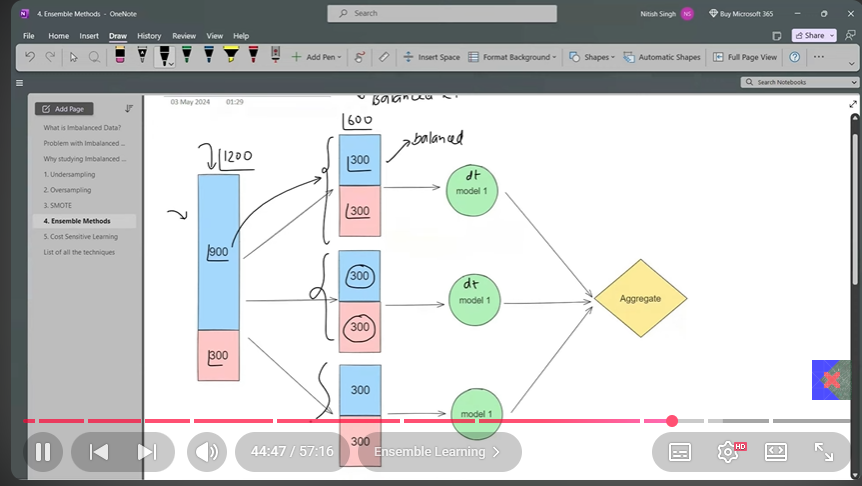

In [1]:
import numpy as np
from collections import Counter

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Simple numerical dataset
X = np.array([
    [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
    [2, 2], [2, 3], [2, 4], [2, 5], [2, 6]
])

# Imbalanced labels
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

print("Before:", Counter(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
brf = BalancedRandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    sampling_strategy="auto"  # har tree me balanced sample
)

brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



# 🔥 Important Parameters (Interview)
BalancedRandomForestClassifier(
    n_estimators=200,        # trees
    max_depth=None,         # tree depth
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",    # features per split
    sampling_strategy="auto",
    replacement=True,       # bootstrap with replacement
    class_weight=None       # already balanced internally
)

Before: Counter({np.int64(0): 8, np.int64(1): 2})

Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


BalancedRandomForestClassifier(n_estimators=200, sampling_strategy='auto')

## Classweight

isme like tum jo minority class ki label uske liye update gradient update bahut bada as compare to majority class



harr like svm linear grad and decision tree mein class_weight ka hyperparmeter hote usme de skate ho toh vo class weight jyda update

In [ ]:
svm = SVC(
    kernel="linear",
    class_weight="balanced"  # 🔥 key line
)

#yaha pe minority class ko more weightage mil jaega

# idme 0ko 5 weight and 1 ko 1 weightage milega so 0 yaha minority isko 10 20 kar sakte and kab acha result
svm = SVC(
    kernel="linear",
    class_weight={0:5,1:1}  # 🔥 key line
)